**Importing all required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the dataset**

Next step is to load the downloaded dataset named ‘weatherHistory.csv’. To load the dataset use read_csv() function as the dataset is in CSV form.

In [ ]:
data = pd.read_csv("weatherHistory.csv")

Read the first 5 rows from data using head() function. Here is a small preview of how our data-set looks:

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


---
**Data Preparation and Cleaning**

Get a List of all Column Names in DataFrame

In [ ]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

As you can see we have a total of 10 fields like Summary, Precip Type, Temperature, etc.
Our task to analyze the change in temperature and humidity so focus on Important factors and exclude others factors from the dataset. Creating a new dataframe with the necessary features such as Apparent temperature, Humidity and Formatted date.

In [ ]:
titles = ['Formatted Date','Apparent Temperature (C)','Humidity']
req_data = data[titles]
req_data.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


check for any null or missing values in the dataset. We can check for any missing values using the isnull() function. since having a large dataset, we can incorporate sum() function to get the total number of missing value in each columns.

In [ ]:
req_data.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

As we can see there are no rows having missing values. Good to go !

Now Displaying column ‘Formatted Date’

In [ ]:
req_data['Formatted Date']

0        2006-04-01 00:00:00.000 +0200
1        2006-04-01 01:00:00.000 +0200
2        2006-04-01 02:00:00.000 +0200
3        2006-04-01 03:00:00.000 +0200
4        2006-04-01 04:00:00.000 +0200
                     ...              
96448    2016-09-09 19:00:00.000 +0200
96449    2016-09-09 20:00:00.000 +0200
96450    2016-09-09 21:00:00.000 +0200
96451    2016-09-09 22:00:00.000 +0200
96452    2016-09-09 23:00:00.000 +0200
Name: Formatted Date, Length: 96453, dtype: object

the column ‘Formatted Date’ is of data type ‘object’.
we need to convert “ Formatted Date” column type from string object into date time object i.e standard Python Datetime format (+00:00 UTC). For this we use to_ datetime () function.

In [ ]:
req_data['Formatted Date'] = pd.to_datetime(req_data['Formatted Date'],utc=True)
req_data['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

Setting Index column using set_index() method.

In [ ]:
req_data = req_data.set_index('Formatted Date')
req_data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


“Formatted Date” column has been made the index column of the dataframe.

Now, we will resample our time series data from hourly daily data into monthly data. Resampling is a convenient method for frequency conversion.  ‘M’ is called DateOffset. which indicates Month. “M” specifies that we have aggregated or resampled our data based on month. So we have resampled the data through mean values because we are using average Apparent Temperature (C) and average humidity.

In [ ]:
req_data = req_data.resample('M').mean()

Here is how the data looks after resampling

In [ ]:
req_data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


---
**Data Visualization**



Comparing Apparent temperature (C) and Humidity over past 10 years. We use the lineplot() function to plot the Variation of Apparent Temperature and Humidity with time.

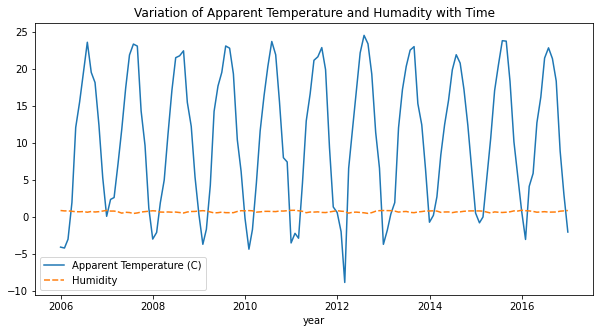

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=req_data)
plt.xlabel('year')
plt.title('Variation of Apparent Temperature and Humadity with Time')
plt.show()

The above Plot shows that humidity is constant throughout 10 years while the Apparent Temperature changed at regular intervals with constant amplitude.

Lets analyze data more using regression concept. Lm plot or reg plot is a statistical method for predictive analysis. Plot the graph as Apparent temperature V/s Humidity. 
We can use the regplot() function to plot the relationship between the “Apparent Temperature ” and “Humidity”.

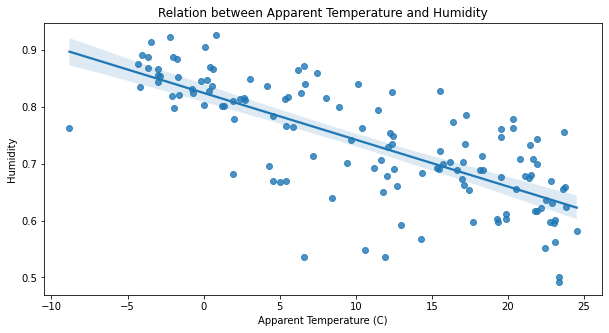

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(data = req_data,x='Apparent Temperature (C)',y='Humidity')
plt.title('Relation between Apparent Temperature and Humidity')
plt.show()

It can be observed that There is a Linear Relation between “Apparent Temperature ” and “Humidity” with a negative slope. As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperatures drop, relative humidity increases.

Thus from the above visualization it is clear that there is a markable change in the Average Apparent Temperature due to Global Warming. The humidity remains approximately constant throughout the time span.

---



**Hypothesis Testing using t test**

In [ ]:
A = req_data['Apparent Temperature (C)']
H = req_data['Humidity']
test = stats.ttest_rel(A,H)
pvalue = test[1]
print(pvalue)

6.686806828886239e-24


In [ ]:
if pvalue > 0.05:
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis")

Reject Null Hypothesis


By performing t- test, it tends to reject the null hypothesis .

---



**Conclusion**

According to Null Hypothesis (H0) both increases due to Global Warming is proven wrong here, and thus null hypothesis failed.
